Run time
--- 17339.91757106781 seconds ---
--- 288.9986261844635 minutes ---
--- 4.8166437697410586 hours ---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the two CSV files
file_path_1 = r'C:\Users\dlaa0001\Documents\PhD\PopSyn_Monash\PopSynthesis\Methods\IPU\output\syn_pp_ipu.csv'  # Update with your file path
file_path_2 = r'C:\Users\dlaa0001\Documents\PhD\PopSyn_Monash\PopSynthesis\Methods\IPU\data\pp_sample_ipu.csv'  # Update with your file path
data1 = pd.read_csv(file_path_1)
data2 = pd.read_csv(file_path_2)

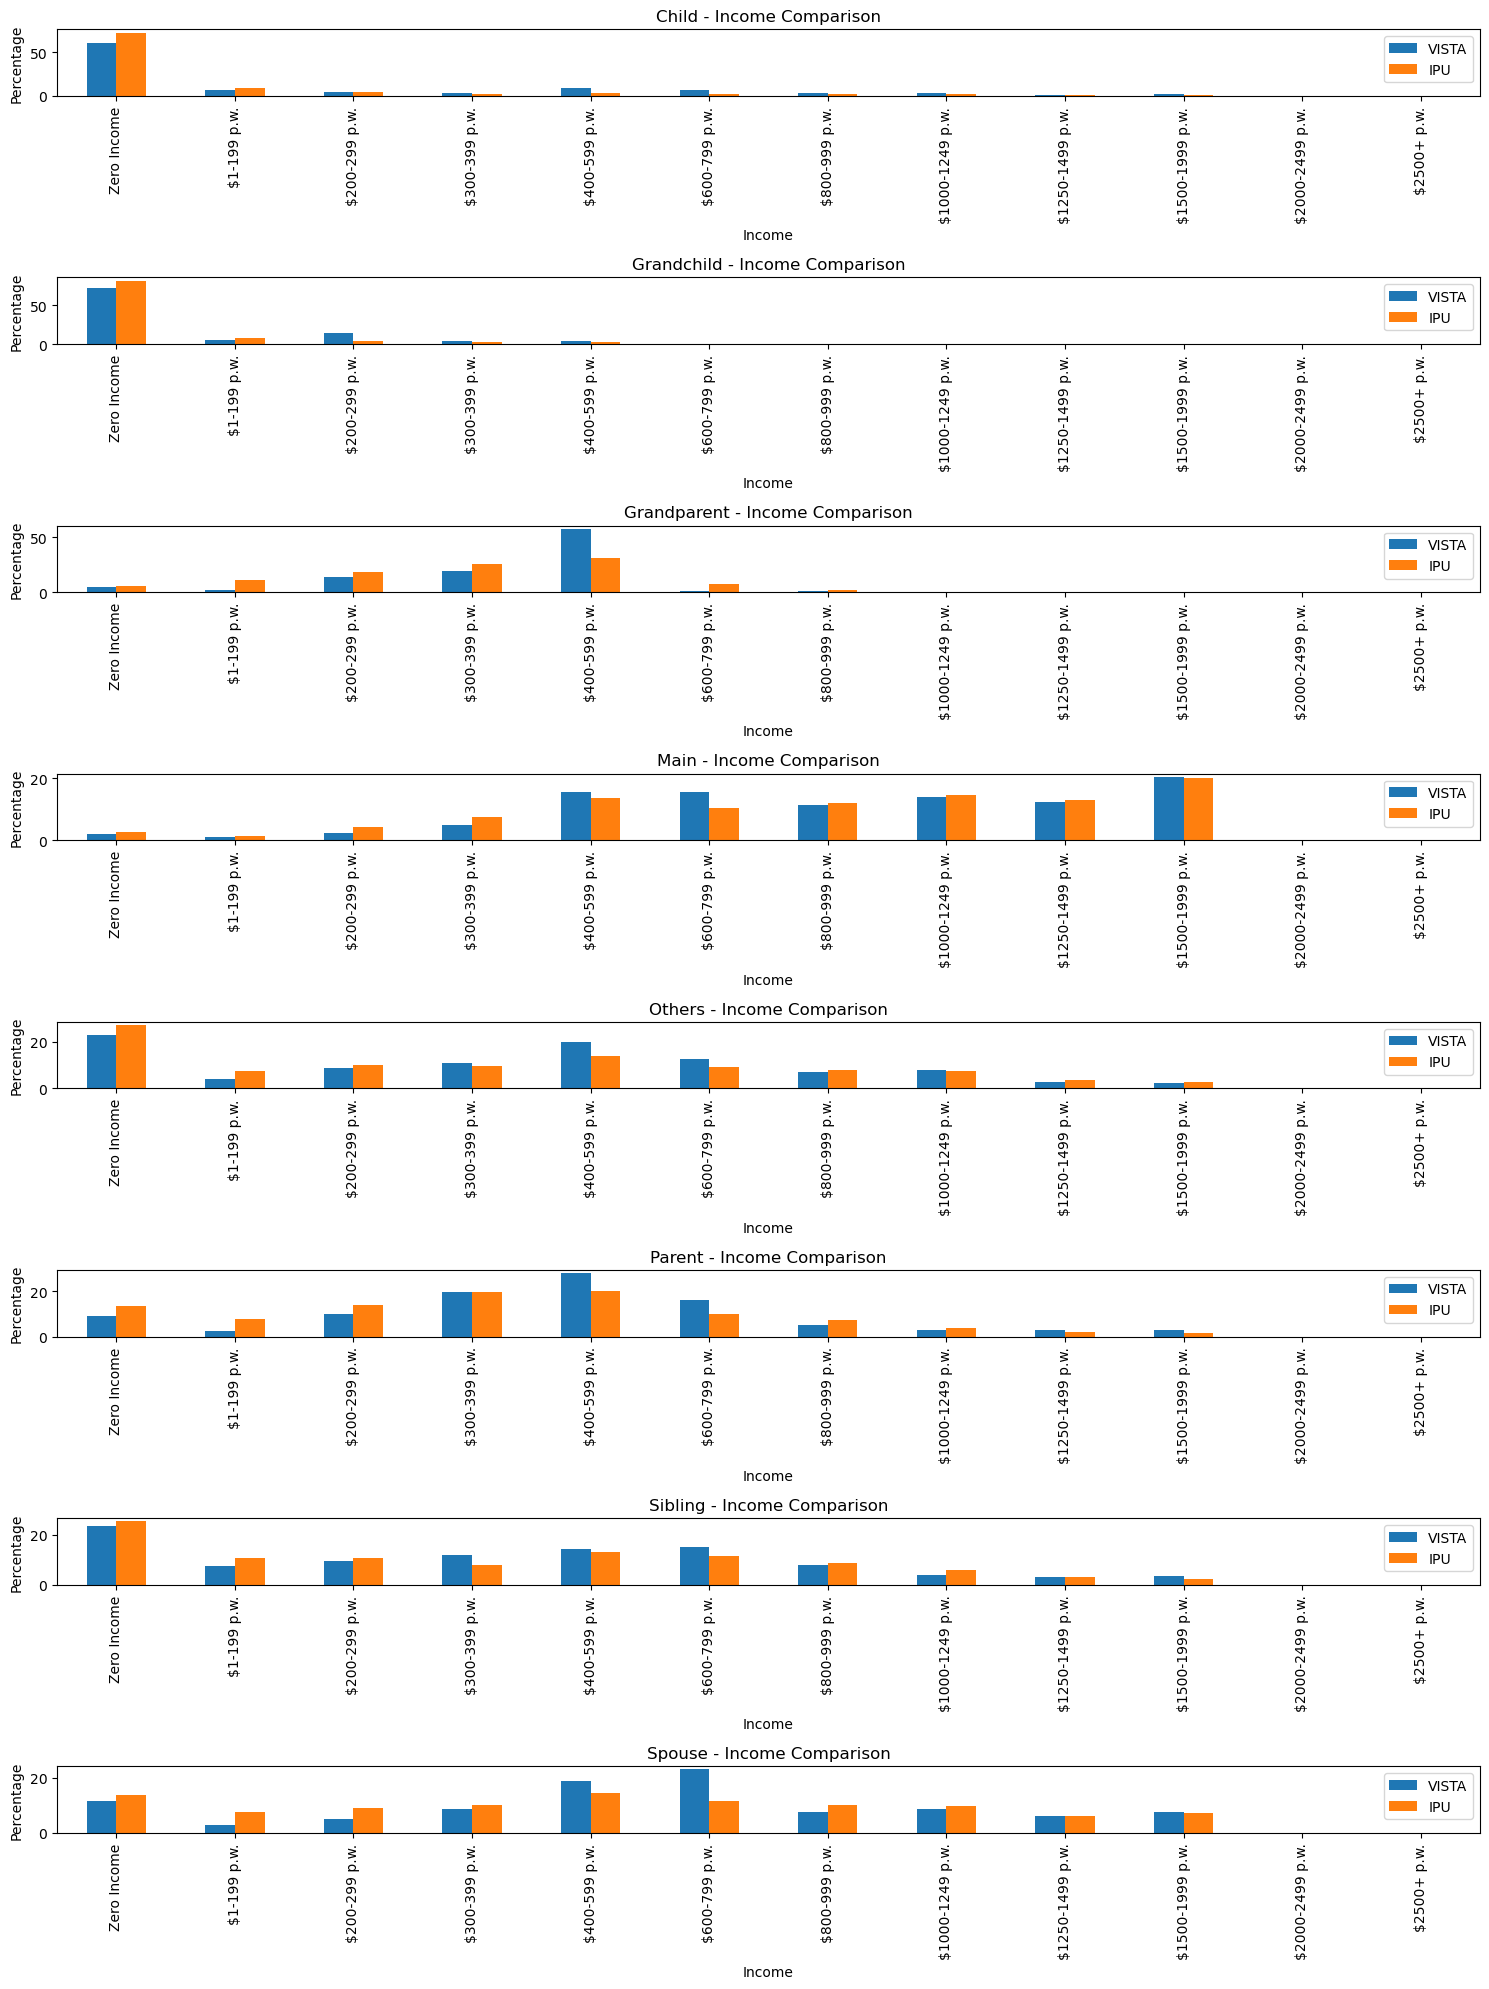

In [2]:
# Order the 'persinc' (income) column
ordered_persinc = [
    'Zero Income', '$1-199 p.w.', '$200-299 p.w.', '$300-399 p.w.', 
    '$400-599 p.w.', '$600-799 p.w.', '$800-999 p.w.', '$1000-1249 p.w.', 
    '$1250-1499 p.w.', '$1500-1999 p.w.', '$2000-2499 p.w.', '$2500+ p.w.'
]

# Apply the ordering to both datasets
data1['persinc'] = pd.Categorical(data1['persinc'], categories=ordered_persinc, ordered=True)
data2['persinc'] = pd.Categorical(data2['persinc'], categories=ordered_persinc, ordered=True)

# Group by 'relationship' for both datasets
relationship_groups_1 = data1.groupby('relationship')
relationship_groups_2 = data2.groupby('relationship')

# Plot the percentage distribution for 'persinc' (income) side by side
fig, axes = plt.subplots(len(relationship_groups_1), 1, figsize=(15, 20))

for i, (relationship, group_data_1) in enumerate(relationship_groups_1):
    # Find corresponding group in second dataset
    group_data_2 = relationship_groups_2.get_group(relationship)
    
    # Percentage for 'persinc' (income) in first dataset
    income_percent_1 = (group_data_1['persinc'].value_counts(normalize=True) * 100).sort_index()
    
    # Percentage for 'persinc' (income) in second dataset
    income_percent_2 = (group_data_2['persinc'].value_counts(normalize=True) * 100).sort_index()

    # Create a DataFrame to hold both percentages for side-by-side comparison
    combined_df = pd.DataFrame({
        'VISTA': income_percent_1,
        'IPU': income_percent_2
    })
    
    # Plot the combined dataframe as a side-by-side bar chart
    ax = axes[i]
    combined_df.plot(kind='bar', ax=ax)
    ax.set_title(f'{relationship} - Income Comparison')
    ax.set_ylabel('Percentage')
    ax.set_xlabel('Income')

plt.tight_layout()
plt.show()

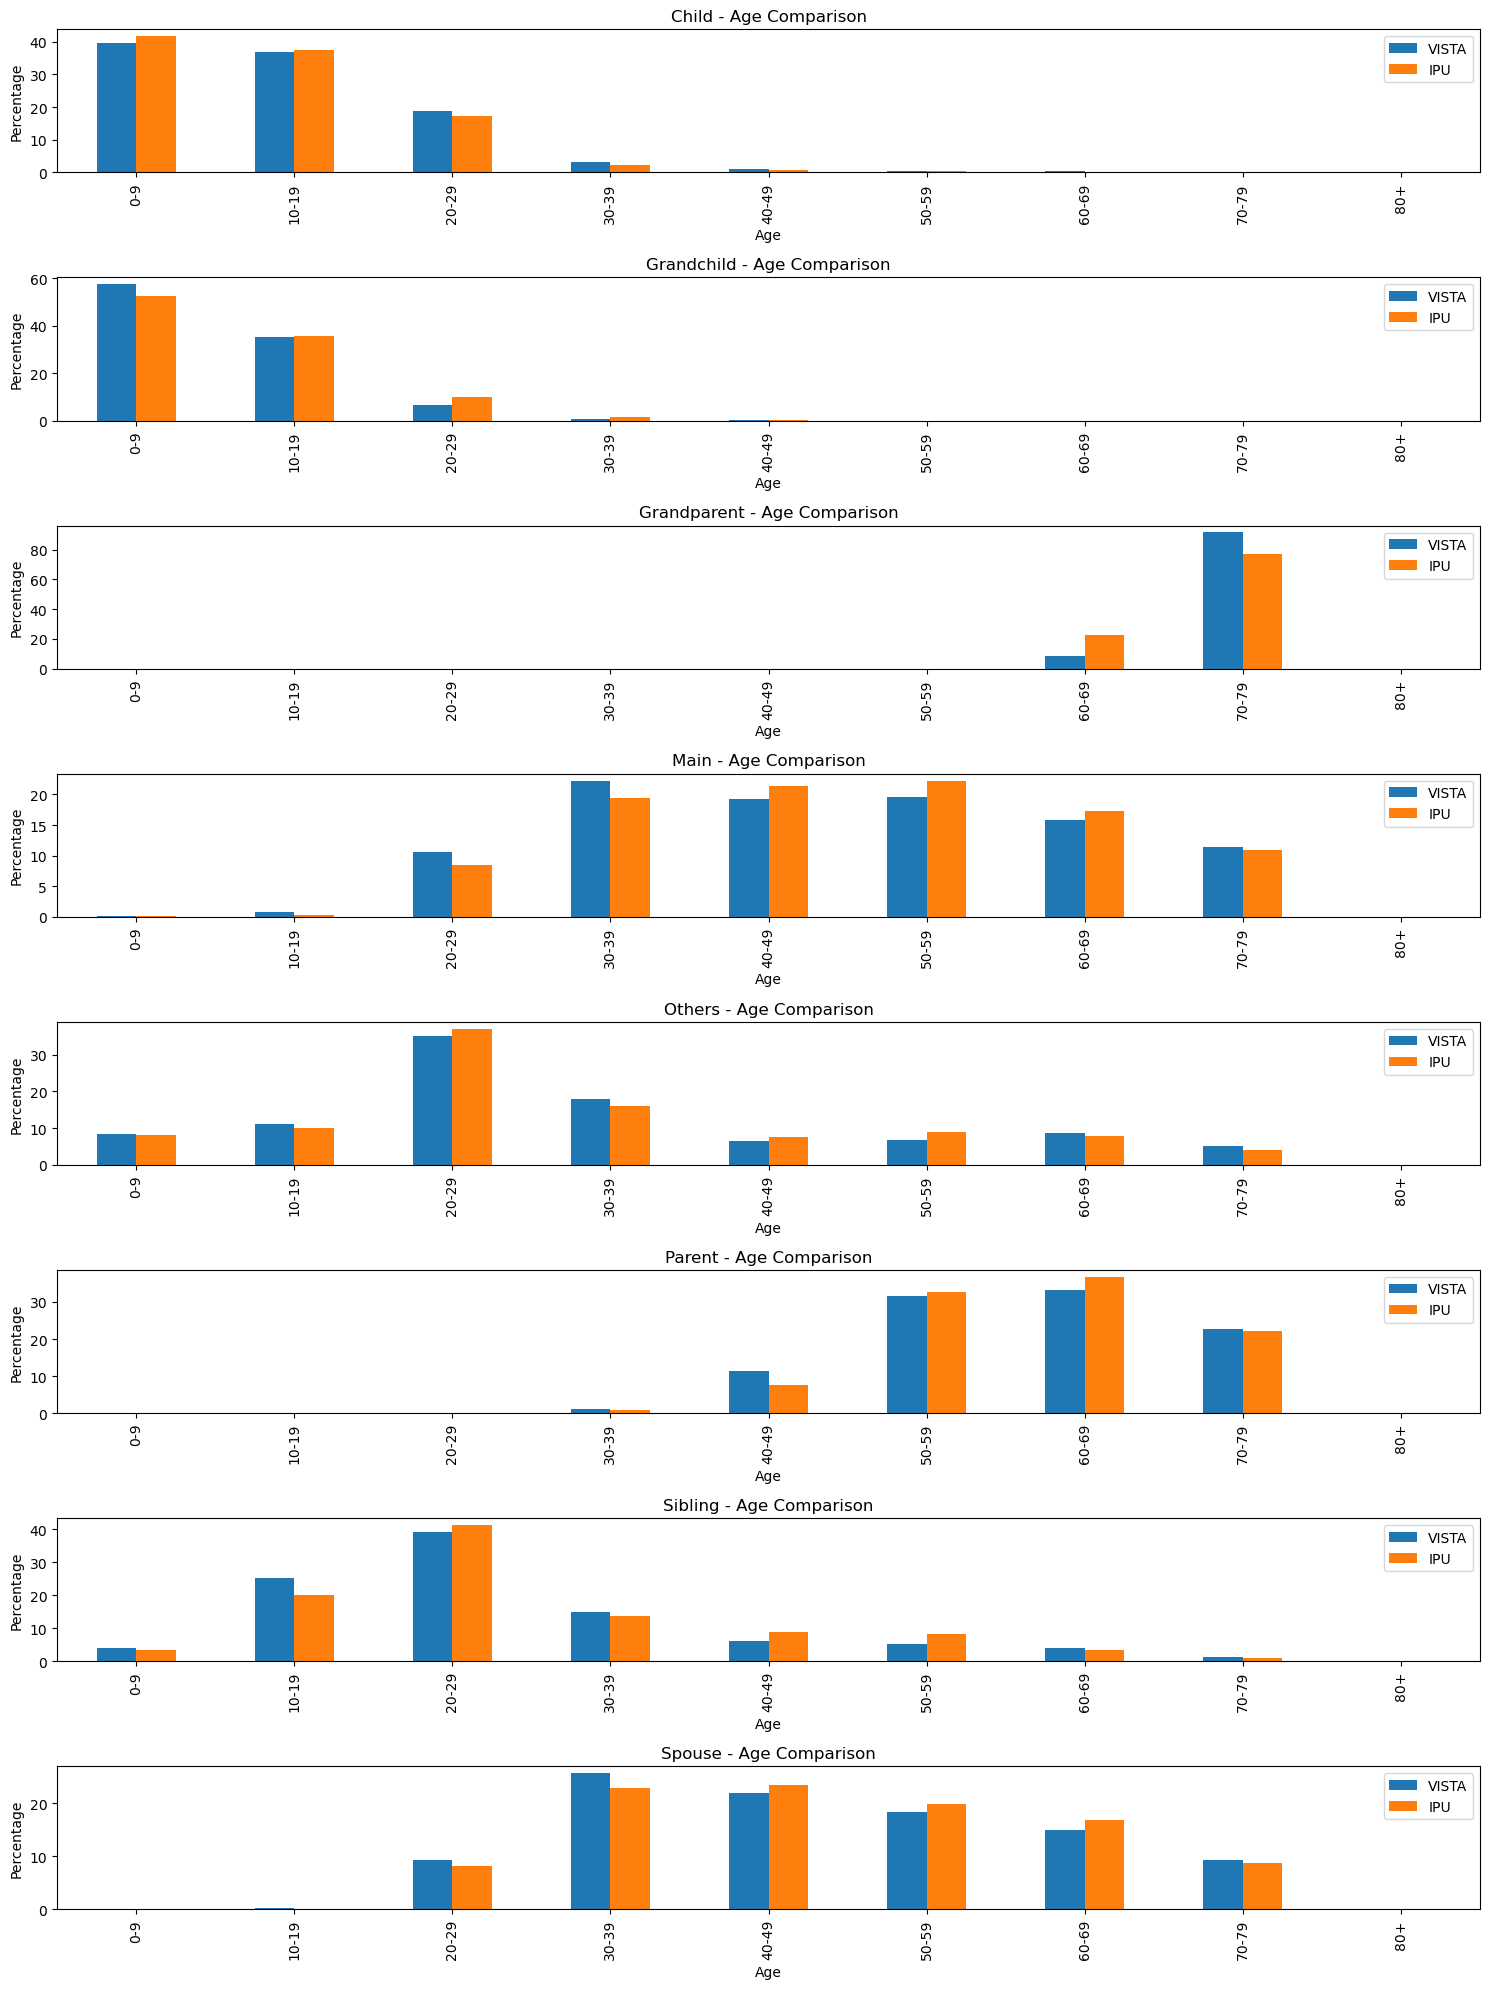

In [3]:
# Order the 'age' column
ordered_age = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

# Apply the ordering to both datasets
data1['age'] = pd.Categorical(data1['age'], categories=ordered_age, ordered=True)
data2['age'] = pd.Categorical(data2['age'], categories=ordered_age, ordered=True)

# Group by 'relationship' for both datasets
relationship_groups_1 = data1.groupby('relationship')
relationship_groups_2 = data2.groupby('relationship')

# Plot the percentage distribution for 'age' side by side
fig, axes = plt.subplots(len(relationship_groups_1), 1, figsize=(15, 20))

for i, (relationship, group_data_1) in enumerate(relationship_groups_1):
    # Find corresponding group in second dataset
    group_data_2 = relationship_groups_2.get_group(relationship)
    
    # Percentage for 'age' in first dataset
    age_percent_1 = (group_data_1['age'].value_counts(normalize=True) * 100).sort_index()
    
    # Percentage for 'age' in second dataset
    age_percent_2 = (group_data_2['age'].value_counts(normalize=True) * 100).sort_index()

    # Create a DataFrame to hold both percentages for side-by-side comparison
    combined_df = pd.DataFrame({
        'VISTA': age_percent_1,
        'IPU': age_percent_2
    })
    
    # Plot the combined dataframe as a side-by-side bar chart
    ax = axes[i]
    combined_df.plot(kind='bar', ax=ax)
    ax.set_title(f'{relationship} - Age Comparison')
    ax.set_ylabel('Percentage')
    ax.set_xlabel('Age')

plt.tight_layout()
plt.show()